In [1]:
import numpy as np

# Simple Neural Network, hagamoslo de cero!

Recuerdo: definimos X como la matriz de entradas (features) e Y como la matriz de salidas esperadas (targets).

In [2]:
X = np.array([
    [0,0,1],
    [1,1,1],
    [1,0,1],
    [0,1,1]
])
y = np.array([[0,1,1,0]]).T # La T es para que sea una matriz columna

Recordemos que la cuenta de una red neuronal simple es:
$$
z = \sum_{i=0}^{n} w_{i} x_i = w_0 x_0 + w_1 x_1 + ... + w_n x_n
$$
A eso le aplicamos una función de activación, en este caso la sigmoide.
Nos quedaría:
$$
output = \sigma(\sum_{i=0}^{n} w_{i} x_i)

Ahora hagamos esta misma cuenta pero programando :)
Definamos las cosas que nos faltan.

In [6]:
weights = [] # Completar. Debería ser una matriz columna con 3 filas (una por cada feature)
weights = np.random.rand(3,1)
print(weights)
def sigmoid(x):
    return 1/(1 +np.exp(-x))# Completar
print(f"El resultado de la sigmoide para 5: {sigmoid(5)}")

[[0.40522923]
 [0.49751392]
 [0.88315552]]
El resultado de la sigmoide para 5: 0.9933071490757153


Ahora, creamos la función de forward propagation. Fijemonos que pasa cuando la usamos con los pesos random.

In [7]:
def forward_prop(X, weights):
    z = np.dot(X, weights)  # Producto punto entre X y los pesos
    output = sigmoid(z)     # Aplicar la función sigmoide
    return output

output = forward_prop(X, weights)
print("Output de la red neuronal con pesos random:")
print(output)

Output de la red neuronal con pesos random:
[[0.7074757 ]
 [0.85642371]
 [0.78387367]
 [0.79909849]]


Claramente no tiene mucho sentido... Intentemos mejorarlo!

Pasos para mejorar la red neuronal:
- Definir una función de pérdida (loss function) para medir qué tan bien lo estamos haciendo.
- Calculo la derivada de la función de pérdida con respecto a los pesos (backpropagation).
Esto es para saber en qué dirección ajustar los pesos (sumo o resto?)
- Repito el proceso varias veces (epochs), ajustando los pesos en cada iteración.

In [8]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [9]:
print("Pesos iniciales:")
print(weights)

error = y - output
print("\n Error inicial:")
print(error)

print("\n Derivada de la función sigmoide aplicada al output:")
print(sigmoid_derivative(output))

ajuste = error * sigmoid_derivative(output)
print("\n Ajuste a aplicar a los pesos:")
print(ajuste)

weights += np.dot(X.T, ajuste)
print("\n Nuevos pesos después del ajuste:")
print(weights)

Pesos iniciales:
[[0.40522923]
 [0.49751392]
 [0.88315552]]

 Error inicial:
[[-0.7074757 ]
 [ 0.14357629]
 [ 0.21612633]
 [-0.79909849]]

 Derivada de la función sigmoide aplicada al output:
[[0.20695384]
 [0.12296214]
 [0.16941574]
 [0.16054009]]

 Ajuste a aplicar a los pesos:
[[-0.14641481]
 [ 0.01765445]
 [ 0.0366152 ]
 [-0.12828735]]

 Nuevos pesos después del ajuste:
[[0.45949888]
 [0.38688102]
 [0.66272302]]


**Consigna:** Hacer este mismo proceso de entrenamiento varias veces (si, es copiar y pegar el codigo de arriba en un for). Cuantas? El número de epochs.

También uardarse los errores en una lista y graficarlas al final para ver como va mejorando la red neuronal!
Recomendación: promediar los errores y tomarles valor absoluto para que no se cancelen entre sí. Esto es solo para graficar mejor


[[0.65987181]
 [0.81892822]
 [0.75440062]
 [0.74069886]]


ValueError: x and y must have same first dimension, but have shapes (1,) and (5000, 4, 1)

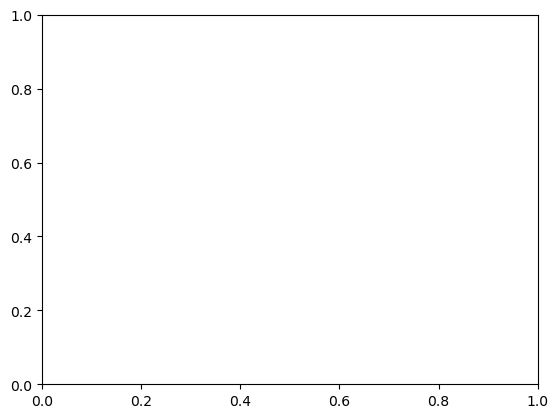

In [12]:
import matplotlib.pyplot as plt
epochs = 5000
errores = []

for epoch in range(epochs):
    z = np.dot(X, weights)  # Producto punto entre X y los pesos
    output = sigmoid(z)     # Aplicar la función sigmoide
    errores.append(y - output)
    pass
print(output)

plt.plot(epochs, errores, marker ="o", linestyle= "-", color="b", label="error por epoch")
plt.legend()
plt.show()
    # Completar

Veamos cómo quedaron los pesos finales

Consigna: Escriban por que les parece que puede tener sentido que esos sean los pesos finales. (Miren el input y el output original)

In [ ]:
print("Pesos finales después del entrenamiento:")
print(weights)

Les dejo un código para graficar la red neuronal con los pesos finales.

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools
G = nx.DiGraph()
layers = [[0, 1, 2], [3]]

rels = list(itertools.product(*layers))
#rels.append((3, 4))
flatten = lambda l: [x for i in l for x in i]

labels = {i: v for i, v in enumerate(X[1])}
labels[3] = round(forward_prop(X[1], weights)[0], 3)
#labels[4] = 0 if res < thresh else 1

pos = {}
m = max([len(l) for l in layers])
for i, l in enumerate(layers):
  for j, v in enumerate(l):
    pos[v] = (i, len(l) - j)

pos[3] = (pos[3][0], pos[1][1])
#pos[4] = (pos[3][0] + 1, pos[1][1])

weights_labels = {(ra, rb): "{:0.3f}".format(weights[i][0]) for i, (ra, rb) in enumerate(rels)}
G.add_edges_from(rels)

options = {
    "font_size": 16,
    "node_size": 3000,
    "node_color": [(1, 1, 1, 1) for _ in range(len(labels))],
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "labels": labels,
    "connectionstyle": "arc3, rad=0",
}

nx.draw_networkx(G, pos, **options)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=weights_labels,
    font_color='black',
    font_size=16, 
    font_weight='bold'
)

plt.axis('off')
ax = plt.gca()
ax.margins(0.20)
plt.show()

**Última consigna**: Prueben algunos ejemplos nuevos, que no estén en el dataset original, y vean qué predice la red neuronal 

**Consigna bastante manija**: Agreguen una capa oculta a la red neuronal.